In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# 1. Explain the dataset

In [4]:
#Reading data into python environment
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# visualizations

Text(0.5, 1.0, 'Distribution of TV advertisements')

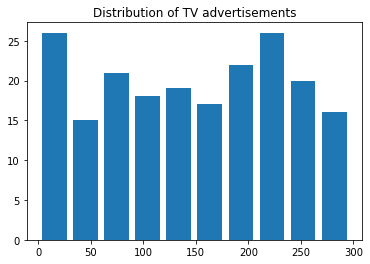

In [39]:
plt.hist(data['TV'],rwidth=0.8)
plt.title('Distribution of TV advertisements')

Text(0.5, 1.0, 'Distribution of Radio advertisements')

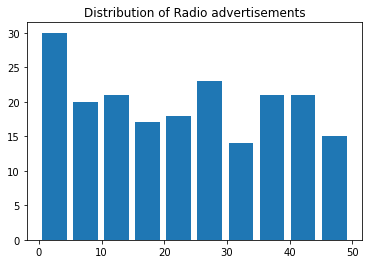

In [38]:
plt.hist(data['Radio'],rwidth=0.8)
plt.title('Distribution of Radio advertisements')

Text(0.5, 1.0, 'Distribution of Newspaper advertisements')

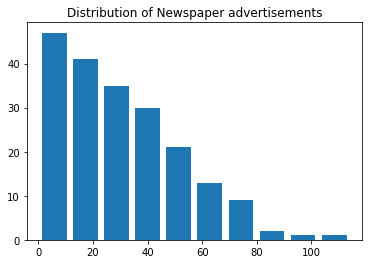

In [37]:
plt.hist(data['Newspaper'], rwidth=0.8)
plt.title('Distribution of Newspaper advertisements')

Text(0.5, 1.0, 'Distribution of Sales')

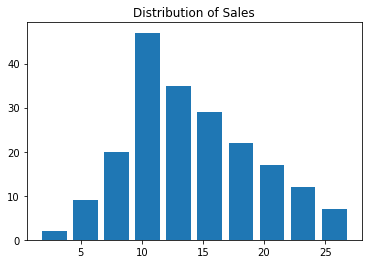

In [36]:
plt.hist(data['Sales'], rwidth=0.8)
plt.title('Distribution of Sales')

Data set cosists of 200 rows and 5 columns.

There are no null values in the data set.

Sales is normally distributed while that of Newspaper advertisement is right skewed

# 2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [8]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Mean

Average amount spent on : 

    1.TV        = 147.042500
    2.Radio     = 23.264000
    3.Newspaper = 30.5540

# Median

In [9]:
print('Median of amount spent on TV advertisement = ',data['TV'].median())
print('Median of amount spent on Radio advertisement = ',data['Radio'].median())
print('Median of amount spent on Newspaper advertisement = ',data['Newspaper'].median())

Median of amount spent on TV advertisement =  149.75
Median of amount spent on Radio advertisement =  22.9
Median of amount spent on Newspaper advertisement =  25.75


# Maximun Amounts

Maximum amount spent on : 

    1.TV        = 296.40
    2.Radio     = 49.60
    3.Newspaper = 114.00

# Minimum Amounts

Minimum amount spent on :

1.TV        = 0.700
2.Radio     = 0.000
3.Newspaper = 0.300

# Percentiles

In [14]:
print('25th percentile of amount spent on Tv advertisement = ',np.percentile(data['TV'], 25))
print('50th percentile of amount spent on Tv advertisement = ',np.percentile(data['TV'], 50))
print('75th percentile of amount spent on Tv advertisement = ',np.percentile(data['TV'], 75))

print('\n\n25th percentile of amount spent on Radio advertisement = ',np.percentile(data['Radio'], 25))
print('50th percentile of amount spent on Radio advertisement = ',np.percentile(data['Radio'], 50))
print('75th percentile of amount spent on Radio advertisement = ',np.percentile(data['Radio'], 75))

print('\n\n25th percentile of amount spent on Newspaper advertisement = ',np.percentile(data['Newspaper'], 25))
print('50th percentile of amount spent on Newspaper advertisement = ',np.percentile(data['Newspaper'], 50))
print('75th percentile of amount spent on Newspaper advertisement = ',np.percentile(data['Newspaper'], 75))

25th percentile of amount spent on Tv advertisement =  74.375
50th percentile of amount spent on Tv advertisement =  149.75
75th percentile of amount spent on Tv advertisement =  218.825


25th percentile of amount spent on Radio advertisement =  9.975
50th percentile of amount spent on Radio advertisement =  22.9
75th percentile of amount spent on Radio advertisement =  36.525


25th percentile of amount spent on Newspaper advertisement =  12.75
50th percentile of amount spent on Newspaper advertisement =  25.75
75th percentile of amount spent on Newspaper advertisement =  45.1


# 3.Find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper).

# Using one way ANOVA

Null Hypothesis,H0 : Same amount was spent on all 3 advertisements
    
Alternate Hypothesis, H1 : Amount spent on atleast one advertisement is different

In [23]:
#numerator degrees of freedom (k-1) = (3-1) = 2
dfn=2
#denominator degrees of freedom(N-k) = (3*200-3) = 597
dfd=597
alpha=.05

In [24]:
f_critical=stats.f.ppf(q=.95,dfn=2,dfd=597)
print('Critical F - value = ',f_critical)

Critical F - value =  3.010815204196057


In [25]:
f_value,p_value=stats.f_oneway(data['TV'],data['Radio'],data['Newspaper'])

In [26]:
print('Calculate F-value = ',f_value)
print('P-value = ',round(p_value,7))

Calculate F-value =  358.8514595342597
P-value =  0.0


In [40]:
f_critical>f_value

False

In [41]:
p_value>alpha

False

# Interpretation :

The F test statistic is 358.85 and the corresponding p-value is 0.00. Since the p-value is  less than .05 and Caculated F-value is greater than critical F-value (3.010) we are forced to reject the null hypothesis (H0).

We can infer that mean of atleast one column is different ,ie, the amount spent on atleast one advertisement is different